# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
import sqlalchemy
import sql_utilities as sqlutil
import support_functions as sf
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:2192: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    #"dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]


In [3]:
regions

['argentina',
 'brazil',
 'chile',
 'colombia',
 'costa_rica',
 'ecuador',
 'el_salvador',
 'guatemala',
 'honduras',
 'jamaica',
 'mexico',
 'nicaragua',
 'panama',
 'paraguay',
 'peru',
 'uruguay']

In [4]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    id_str = "sisepuede_run_2023-02-28T20:47:55.917752",
    logger = logger,
    regions = ["brazil", "chile", "ecuador", "mexico"]
)


2023-02-28 23:25:43,134 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-02-28 23:25:43,135 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-02-28 23:25:43,135 - INFO - 	Setting export engine to 'sqlite'.
2023-02-28 23:25:43,153 - DEBUG - Trying to get columns for ANALYSIS_METADATA with query: select * from ANALYSIS_METADATA limit 0;
2023-02-28 23:25:43,159 - INFO - Table ANALYSIS_METADATA found in sql connection; it will not be replaced.
2023-02-28 23:25:43,160 - INFO - 	Columns successfully retrieved.
2023-02-28 23:25:43,161 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-02-28 23:25:43,161 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-02-28 23:25:43,164 - DEBUG - Trying to get columns for ATTRIBUTE_DESIGN with query: select * from ATTRIBUTE_DESIGN limit 0;
2023-02-28 23:25:43,169 - INFO - Table ATTRIB

## Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [5]:
df_out_all = sisepuede.read_output(None)

In [11]:
df_out_all[df_out_all["region"] == "mexico"]["primary_id"].unique()

array([    0,  5005,  6006,  7007,  8008,  9009, 10010, 11011, 12012,
       13013])

In [14]:
sisepuede.odpt_primary.get_dims_from_key(13013)

(0, 3009, 0)

In [15]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0]
strats_run += list(range(3001, 3012))
strats_run += list(range(3024, 3038))


dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": [x for x in strats_run if x != 3010]#[0, 3008, 3009, 3031]# strats_run#[0, 3025, 3026, 3027]
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2023-02-28 23:36:13,338 - INFO - Running AFOLU model
2023-02-28 23:36:13,729 - INFO - AFOLU model run successfully completed
2023-02-28 23:36:13,730 - INFO - Running CircularEconomy model
2023-02-28 23:36:13,870 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:36:13,870 - INFO - Running IPPU model
2023-02-28 23:36:13,990 - INFO - IPPU model run successfully completed
2023-02-28 23:36:13,991 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:36:14,031 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:36:14,236 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:36:14,237 - INFO - Running Energy model (Electricity: trying to call Julia)
2023-02-28 23:36:14,287 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_inter

2023-28-Feb 23:36:15.603 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-28-Feb 23:36:15.641 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-28-Feb 23:36:42.428 Started modeling scenario.
2023-28-Feb 23:38:13.169 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:38:13,546 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:38:13,567 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:38:13,658 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:38:13,662 - INFO - Model run for primary_id = 15015 successfully completed in 120.32 seconds.
2023-02-28 23:38:13,672 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-28 23:38:13,998 - INFO - AFOLU model run successfully completed
2023-02-28 23:38:13,998 - INFO - Running CircularEconomy model
2023-02-28 23:38:14,097 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:38:14,097 - INFO - Running IPPU model
2023-02-28 23:38:14,200 - INFO - IPPU model run successfully completed
2023-02-28 23:38:14,201 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:38:14,239 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:38:14,396 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:38:14,397 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:38:16.354 Started modeling scenario.
2023-28-Feb 23:39:04.781 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:39:05,120 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:39:05,141 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:39:05,227 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:39:05,230 - INFO - Model run for primary_id = 28028 successfully completed in 51.56 seconds.



	Running Energy (Fugitive Emissions)


2023-02-28 23:39:05,671 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-28 23:39:05,675 - INFO - Running AFOLU model
2023-02-28 23:39:05,979 - INFO - AFOLU model run successfully completed
2023-02-28 23:39:05,980 - INFO - Running CircularEconomy model
2023-02-28 23:39:06,081 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:39:06,082 - INFO - Running IPPU model
2023-02-28 23:39:06,187 - INFO - IPPU model run successfully completed
2023-02-28 23:39:06,188 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:39:06,227 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:39:06,388 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:39:06,389 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-28-Feb 23:39:08.257 Started modeling scenario.
2023-28-Feb 23:39:57.451 Finished modeling scenario.


2023-02-28 23:39:57,782 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:39:57,801 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:39:57,884 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:39:57,887 - INFO - Model run for primary_id = 29029 successfully completed in 52.21 seconds.
2023-02-28 23:39:57,891 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-28 23:39:58,196 - INFO - AFOLU model run successfully completed
2023-02-28 23:39:58,196 - INFO - Running CircularEconomy model
2023-02-28 23:39:58,289 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:39:58,289 - INFO - Running IPPU model
2023-02-28 23:39:58,387 - INFO - IPPU model run successfully completed
2023-02-28 23:39:58,388 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:39:58,426 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:39:58,579 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:39:58,580 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:40:00.435 Started modeling scenario.
2023-28-Feb 23:41:04.390 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:41:04,740 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:41:04,762 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:41:04,848 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:41:04,851 - INFO - Model run for primary_id = 30030 successfully completed in 66.96 seconds.



	Running Energy (Fugitive Emissions)


2023-02-28 23:41:05,275 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-28 23:41:05,280 - INFO - Running AFOLU model
2023-02-28 23:41:05,588 - INFO - AFOLU model run successfully completed
2023-02-28 23:41:05,589 - INFO - Running CircularEconomy model
2023-02-28 23:41:05,685 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:41:05,686 - INFO - Running IPPU model
2023-02-28 23:41:05,783 - INFO - IPPU model run successfully completed
2023-02-28 23:41:05,784 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:41:05,824 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:41:05,978 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:41:05,978 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-28-Feb 23:41:08.018 Started modeling scenario.
2023-28-Feb 23:42:05.943 Finished modeling scenario.


2023-02-28 23:42:06,281 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:42:06,303 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:42:06,387 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:42:06,390 - INFO - Model run for primary_id = 31031 successfully completed in 61.11 seconds.
2023-02-28 23:42:06,394 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-28 23:42:06,697 - INFO - AFOLU model run successfully completed
2023-02-28 23:42:06,698 - INFO - Running CircularEconomy model
2023-02-28 23:42:06,794 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:42:06,795 - INFO - Running IPPU model
2023-02-28 23:42:06,892 - INFO - IPPU model run successfully completed
2023-02-28 23:42:06,893 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:42:06,931 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:42:07,079 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:42:07,080 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:42:09.679 Started modeling scenario.
2023-28-Feb 23:43:03.179 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:43:03,512 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:43:03,532 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:43:03,618 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:43:03,621 - INFO - Model run for primary_id = 32032 successfully completed in 57.23 seconds.



	Running Energy (Fugitive Emissions)


2023-02-28 23:43:04,032 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-28 23:43:04,036 - INFO - Running AFOLU model
2023-02-28 23:43:04,338 - INFO - AFOLU model run successfully completed
2023-02-28 23:43:04,338 - INFO - Running CircularEconomy model
2023-02-28 23:43:04,437 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:43:04,437 - INFO - Running IPPU model
2023-02-28 23:43:04,541 - INFO - IPPU model run successfully completed
2023-02-28 23:43:04,541 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:43:04,580 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:43:04,736 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:43:04,736 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-28-Feb 23:43:06.763 Started modeling scenario.
2023-28-Feb 23:44:26.278 Finished modeling scenario.


2023-02-28 23:44:26,615 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:44:26,635 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:44:26,727 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:44:26,730 - INFO - Model run for primary_id = 33033 successfully completed in 82.69 seconds.
2023-02-28 23:44:26,733 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-28 23:44:27,047 - INFO - AFOLU model run successfully completed
2023-02-28 23:44:27,048 - INFO - Running CircularEconomy model
2023-02-28 23:44:27,149 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:44:27,150 - INFO - Running IPPU model
2023-02-28 23:44:27,257 - INFO - IPPU model run successfully completed
2023-02-28 23:44:27,258 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:44:27,298 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:44:27,456 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:44:27,457 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:44:29.337 Started modeling scenario.
2023-28-Feb 23:45:21.994 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:45:22,330 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:45:22,351 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:45:22,439 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:45:22,441 - INFO - Model run for primary_id = 34034 successfully completed in 55.71 seconds.



	Running Energy (Fugitive Emissions)


2023-02-28 23:45:22,863 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-28 23:45:22,867 - INFO - Running AFOLU model
2023-02-28 23:45:23,166 - INFO - AFOLU model run successfully completed
2023-02-28 23:45:23,167 - INFO - Running CircularEconomy model
2023-02-28 23:45:23,266 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:45:23,266 - INFO - Running IPPU model
2023-02-28 23:45:23,365 - INFO - IPPU model run successfully completed
2023-02-28 23:45:23,366 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:45:23,405 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:45:23,560 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:45:23,561 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:45:25.578 Started modeling scenario.
2023-28-Feb 23:46:34.392 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:46:34,729 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:46:34,751 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:46:34,836 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:46:34,839 - INFO - Model run for primary_id = 35035 successfully completed in 71.97 seconds.
2023-02-28 23:46:34,843 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-28 23:46:35,156 - INFO - AFOLU model run successfully completed
2023-02-28 23:46:35,157 - INFO - Running CircularEconomy model
2023-02-28 23:46:35,253 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:46:35,254 - INFO - Running IPPU model
2023-02-28 23:46:35,352 - INFO - IPPU model run successfully completed
2023-02-28 23:46:35,353 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:46:35,390 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:46:35,546 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:46:35,546 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:46:37.441 Started modeling scenario.
2023-28-Feb 23:47:37.407 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:47:37,751 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:47:37,772 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:47:37,856 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:47:37,858 - INFO - Model run for primary_id = 36036 successfully completed in 63.02 seconds.



	Running Energy (Fugitive Emissions)


2023-02-28 23:47:38,291 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-28 23:47:38,294 - INFO - Running AFOLU model
2023-02-28 23:47:38,609 - INFO - AFOLU model run successfully completed
2023-02-28 23:47:38,610 - INFO - Running CircularEconomy model
2023-02-28 23:47:38,706 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:47:38,707 - INFO - Running IPPU model
2023-02-28 23:47:38,806 - INFO - IPPU model run successfully completed
2023-02-28 23:47:38,806 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:47:38,845 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:47:39,009 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:47:39,010 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:47:41.645 Started modeling scenario.
2023-28-Feb 23:48:31.648 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:48:32,010 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:48:32,035 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:48:32,127 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:48:32,130 - INFO - Model run for primary_id = 37037 successfully completed in 53.84 seconds.
2023-02-28 23:48:32,135 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-28 23:48:32,449 - INFO - AFOLU model run successfully completed
2023-02-28 23:48:32,450 - INFO - Running CircularEconomy model
2023-02-28 23:48:32,548 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:48:32,549 - INFO - Running IPPU model
2023-02-28 23:48:32,653 - INFO - IPPU model run successfully completed
2023-02-28 23:48:32,654 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:48:32,694 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:48:32,859 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:48:32,859 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:48:34.772 Started modeling scenario.
2023-28-Feb 23:49:26.510 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:49:26,878 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:49:26,897 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:49:26,983 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:49:26,986 - INFO - Model run for primary_id = 38038 successfully completed in 54.85 seconds.



	Running Energy (Fugitive Emissions)


2023-02-28 23:49:27,405 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-28 23:49:27,410 - INFO - Running AFOLU model
2023-02-28 23:49:27,718 - INFO - AFOLU model run successfully completed
2023-02-28 23:49:27,719 - INFO - Running CircularEconomy model
2023-02-28 23:49:27,813 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:49:27,814 - INFO - Running IPPU model
2023-02-28 23:49:27,914 - INFO - IPPU model run successfully completed
2023-02-28 23:49:27,915 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:49:27,955 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:49:28,105 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:49:28,106 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-28-Feb 23:49:29.986 Started modeling scenario.
2023-28-Feb 23:50:23.231 Finished modeling scenario.


2023-02-28 23:50:23,565 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:50:23,586 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:50:23,669 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:50:23,672 - INFO - Model run for primary_id = 39039 successfully completed in 56.26 seconds.
2023-02-28 23:50:23,676 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-28 23:50:23,968 - INFO - AFOLU model run successfully completed
2023-02-28 23:50:23,969 - INFO - Running CircularEconomy model
2023-02-28 23:50:24,059 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:50:24,060 - INFO - Running IPPU model
2023-02-28 23:50:24,172 - INFO - IPPU model run successfully completed
2023-02-28 23:50:24,172 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:50:24,215 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:50:24,373 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:50:24,374 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:50:26.221 Started modeling scenario.
2023-28-Feb 23:51:29.412 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:51:29,757 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:51:29,777 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:51:29,865 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:51:29,869 - INFO - Model run for primary_id = 40040 successfully completed in 66.19 seconds.



	Running Energy (Fugitive Emissions)


2023-02-28 23:51:30,337 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-28 23:51:30,342 - INFO - Running AFOLU model
2023-02-28 23:51:30,680 - INFO - AFOLU model run successfully completed
2023-02-28 23:51:30,680 - INFO - Running CircularEconomy model
2023-02-28 23:51:30,779 - INFO - CircularEconomy model run successfully completed
2023-02-28 23:51:30,780 - INFO - Running IPPU model
2023-02-28 23:51:30,887 - INFO - IPPU model run successfully completed
2023-02-28 23:51:30,888 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-28 23:51:30,925 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-28 23:51:31,092 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-28 23:51:31,093 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-28-Feb 23:51:33.085 Started modeling scenario.
2023-28-Feb 23:52:33.971 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-28 23:52:34,307 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-28 23:52:34,329 - INFO - ElectricEnergy model run successfully completed
2023-02-28 23:52:34,403 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-28 23:52:34,406 - INFO - Model run for primary_id = 41041 successfully completed in 64.06 seconds.



	Running Energy (Fugitive Emissions)


2023-02-28 23:52:34,796 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-28 23:52:34,813 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [5]:
#sisepuede.attribute_strategy.table
import inspect
import sqlalchemy
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}")
 

region = "brazil"
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 0, True)

if True:
    df_in.to_csv(
        os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
        encoding = "UTF-8",
        index = None
    )

In [61]:
#attr_strat.table
sisepuede.model_attributes.get_standard_variables(
    df_filt_intervention,
    sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #model_elec.modvar_entc_nemomod_production_by_technology
    #model_energy.modvar_fgtv_emissions_ch4
)

,nemomod_entc_annual_production_by_technology_pp_biogas,nemomod_entc_annual_production_by_technology_pp_biomass,nemomod_entc_annual_production_by_technology_pp_coal,nemomod_entc_annual_production_by_technology_pp_coal_ccs,nemomod_entc_annual_production_by_technology_pp_geothermal,nemomod_entc_annual_production_by_technology_pp_hydropower,nemomod_entc_annual_production_by_technology_pp_gas,nemomod_entc_annual_production_by_technology_pp_gas_ccs,nemomod_entc_annual_production_by_technology_pp_nuclear,nemomod_entc_annual_production_by_technology_pp_ocean,nemomod_entc_annual_production_by_technology_pp_oil,nemomod_entc_annual_production_by_technology_pp_solar,nemomod_entc_annual_production_by_technology_pp_waste_incineration,nemomod_entc_annual_production_by_technology_pp_wind,nemomod_entc_annual_production_by_technology_st_batteries,nemomod_entc_annual_production_by_technology_st_compressed_air,nemomod_entc_annual_production_by_technology_st_flywheels
0,0.0,0.233109,239.381435,0.0,1318.771611,44.507591,227.281935,0.0,82.979367,0.0,223.584576,11.036604,0.0,62.755648,1.584894e-01,0.0,0.0
1,0.0,0.237279,238.399789,0.0,1325.041364,42.674416,218.019289,0.0,75.292289,0.0,233.816634,13.234280,0.0,72.822090,4.052698e-04,0.0,0.0
2,0.0,0.065290,215.017345,0.0,1315.643147,40.980355,230.082689,0.0,76.639737,0.0,266.562969,21.884021,0.0,71.862419,0.000000e+00,0.0,0.0
3,0.0,0.000000,176.637208,0.0,1312.020056,34.847934,221.315195,0.0,91.172878,0.0,305.237067,23.973935,0.0,87.578543,0.000000e+00,0.0,0.0
4,0.0,0.000000,176.946092,0.0,1315.910537,36.119682,167.980426,0.0,77.656245,0.0,308.913163,64.090484,0.0,119.742346,0.000000e+00,0.0,0.0
5,0.0,0.000000,101.363196,0.0,1344.507077,33.214847,188.625600,0.0,76.651613,0.0,315.626270,81.304440,0.0,139.436562,4.073531e-04,0.0,0.0
6,0.0,0.000000,70.468191,0.0,1318.097841,32.352883,235.826292,0.0,78.214632,0.0,309.426638,96.887857,0.0,143.468919,0.000000e+00,0.0,0.0
7,0.0,0.000000,133.869413,0.0,1258.712759,33.600374,248.132951,0.0,68.746758,0.0,322.521810,93.459726,0.0,136.505528,4.063088e-04,0.0,0.0
8,0.0,0.000000,203.663144,0.0,1323.861770,41.739532,244.764295,0.0,78.310828,0.0,318.060218,37.240121,0.0,79.336481,0.000000e+00,0.0,0.0
9,0.0,0.000000,205.417687,0.0,1335.266739,42.099115,246.872921,0.0,78.985470,0.0,320.800283,37.560942,0.0,80.019959,0.000000e+00,0.0,0.0


In [14]:
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)

df = sqlutil.sql_table_to_df(engine, sisepuede.model_attributes.table_nemomod_total_annual_capacity)
df[
    df["y"].isin(["1000"])
]

,r,t,y,val,solvedtm
0,brazil,fp_hydrogen_gasification,1000,3.577427e-02,2023-02-28 17:24:31.626
1,brazil,fp_natural_gas,1000,7.557682e+01,2023-02-28 17:24:31.626
2,brazil,fp_petroleum_refinement,1000,2.674136e+02,2023-02-28 17:24:31.626
3,brazil,me_coal,1000,9.143750e+00,2023-02-28 17:24:31.626
4,brazil,me_crude,1000,2.971687e+02,2023-02-28 17:24:31.626
5,brazil,me_natural_gas,1000,7.557682e+01,2023-02-28 17:24:31.626
6,brazil,pp_biomass,1000,1.073532e+01,2023-02-28 17:24:31.626
7,brazil,pp_coal,1000,1.244126e+01,2023-02-28 17:24:31.626
8,brazil,pp_gas,1000,8.423358e+01,2023-02-28 17:24:31.626
9,brazil,pp_hydropower,1000,1.337270e+02,2023-02-28 17:24:31.626


In [16]:
df_out_all = sisepuede.read_output(None)

#attr_strat.table
#df_out["primary_id"].unique()


In [18]:

region = "mexico"
df_out = df_out_all[df_out_all["region"] == region]
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(dict_filt)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 0, True)

attr_strat = sisepuede.model_attributes.dict_attributes.get("dim_strategy_id")


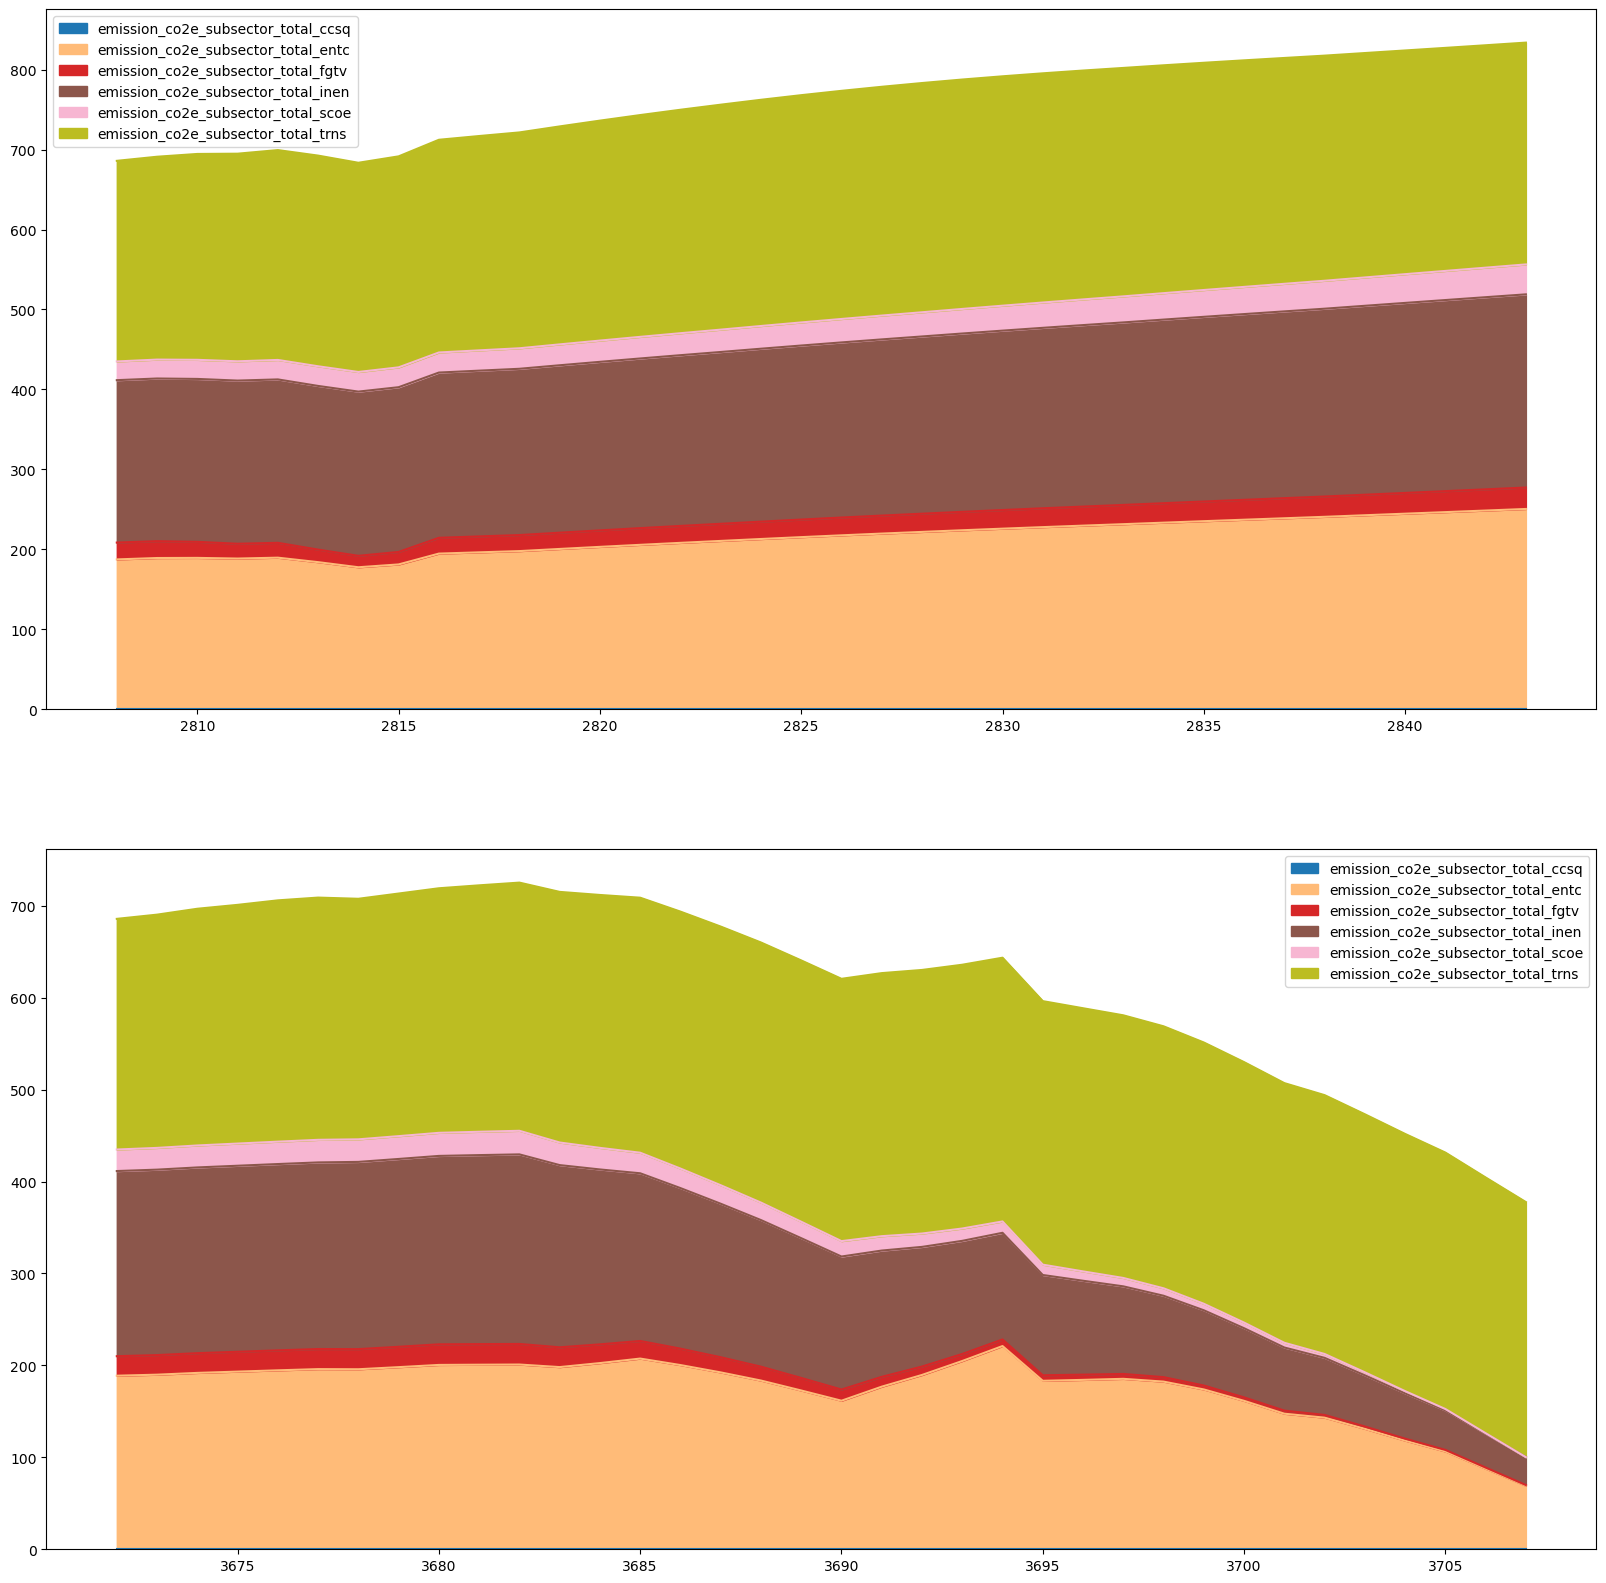

In [35]:
# 3008, 3009, 3031
strat_id, strat_id_intervention = 0, 3037

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)
df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]

# intervention
dict_filt_invervention = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt_invervention.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt_invervention)
df_filt_intervention = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]


df_in_filt = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id])
]

df_in_filt_intervention = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id_intervention])
]


fig, ax = plt.subplots(2, 1, figsize = (20, 20))
palette_func = plt.cm.tab20#plt.cm.hsv

flds = [
    x for x in df_filt.columns 
    if x.startswith("emission_co2e_subsector_total") 
    and (
        ("ccsq" in x) 
        or ("entc" in x)
        or ("enfu" in x)
        or ("fgtv" in x)
        or ("inen" in x)
        or ("scoe" in x)
        or ("trns" in x)
    )
]

if True:
    
    modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_emissions_co2_mne
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = model_elec.modvar_entc_nemomod_production_by_technology
    modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt,
        modvar_plot
    )
    df = df_filt[flds]
    for k in df.columns:
        df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df.plot.area(ax = ax[0], color = colors)
    
    
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt_intervention,
        modvar_plot
    )
    df = df_filt_intervention[flds]
    for k in df.columns:
        df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df.plot.area(ax = ax[1], color = colors)
    

if False:
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt_intervention,
        sisepuede.models.model_energy.modvar_ccsq_emissions_co2#modvar_ccsq_emissions_co2
        #modvar_inen_emissions_co2
        #model_elec.modvar_entc_nemomod_production_by_technology
        #model_energy.modvar_fgtv_emissions_ch4
    )
    for k in df.columns:
        df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df.plot.area(ax = ax, color = colors)
        
        
        
        
if False:
    sisepuede.model_attributes.get_standard_variables(
        df_in_filt,
        sisepuede.models.model_electricity.modvar_entc_nemomod_residual_capacity
    ).plot.area(ax = ax)



In [92]:
df_filt_m = df_melt[
    df_melt[sisepuede.key_primary].isin([primary_id]) & 
    df_melt["region"].isin(["brazil"])
]
df_filt_intervention_m = df_melt[
    df_melt[sisepuede.key_primary].isin([primary_id_intervention]) & 
    df_melt["region"].isin(["brazil"])
]

In [103]:
s_o = [
    x for x in df_filt_intervention.columns 
    if "emission_co2e_" in x 
    and ("subsector_total" not in x) 
    and (
        ("_entc_" in x) 
        or ("_inen_" in x)
        or ("_scoe_" in x)
        or ("_ccsq_" in x)
        or ("_trns_" in x)
        or ("_enfu_" in x)
        or ("_fgtv_" in x)
    )
]
s_m = [x for x in df_filt_intervention_m.columns if "emission_co2e_" in x and ("subsector_total" not in x)]


In [157]:
dfm = pd.read_csv("/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/summary_energy_results_for_nidhi_sisepuede_run_2023-02-27T20;22;51.218776/summary_energy_results_for_nidhi_sisepuede_run_2023-02-27T20;22;51.218776.csv")
dfm = dfm[
    dfm["variable"].isin(s_o) & 
    dfm["region"].isin(["brazil"]) & 
    dfm["time_period"].isin([35])
]

dfm_base = dfm[dfm["primary_id"] == primary_id]
dfm_base_intervention = dfm[dfm["primary_id"] == primary_id_intervention]

In [160]:
dfm_base["value"].sum()


987.3990123741796

In [148]:
df_filt_m[s_o].sum(axis = 1).tail()

31    976.090000
32    978.782711
33    981.552760
34    984.419348
35    987.399012
dtype: float64

In [152]:
df_filt_intervention_m[s_o].sum(axis = 1).tail()

607    954.671911
608    956.344713
609    958.094852
610    959.941531
611    961.901286
dtype: float64

In [ ]:
###### df_out[df_out["primary_id"] == 0][[x for x in df_out.columns if ("energy_demand_enfu_total_fuel" in x) and ("demand" in x)]].iloc[0]


strat_id, strat_id_intervention = 0, 3001

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)

df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]


# intervention
dict_filt3 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt3.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt3)

df_filt_int = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]

#modvar = sisepuede.models.model_electricity.modvar_enfu_energy_demand_by_fuel_total
model_energy = sisepuede.models.model_energy
modvar = model_energy.modvar_enfu_energy_demand_by_fuel_inen#
modvar = "Energy Consumption from Industrial Energy"
modvar = "Energy Consumption from SCOE"
#modvar = model_energy.modvar_inen_emissions_co2
modvar = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4

df_test_0 = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    modvar
);

df_test_int = sisepuede.model_attributes.get_standard_variables(
    df_filt_int,
    modvar
);



In [42]:
df_filt_intervention[
    [x for x in df_filt_intervention.columns if ("subsector_total" in x) and ("ccsq" in x)]
]

,emission_co2e_subsector_total_ccsq,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass,energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal,energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke,energy_demand_enfu_subsector_total_pj_ccsq_fuel_crude,energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel,energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity,energy_demand_enfu_subsector_total_pj_ccsq_fuel_furnace_gas,...,energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower,energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene,energy_demand_enfu_subsector_total_pj_ccsq_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_ccsq_fuel_nuclear,energy_demand_enfu_subsector_total_pj_ccsq_fuel_ocean,energy_demand_enfu_subsector_total_pj_ccsq_fuel_oil,energy_demand_enfu_subsector_total_pj_ccsq_fuel_other,energy_demand_enfu_subsector_total_pj_ccsq_fuel_solar,energy_demand_enfu_subsector_total_pj_ccsq_fuel_waste,energy_demand_enfu_subsector_total_pj_ccsq_fuel_wind
2736,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2737,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2738,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2739,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2741,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2742,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2743,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2744,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2745,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
modvar = sisepuede.models.model_energy.modvar_fgtv_frac_reduction_fugitive_leaks
df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    #sisepuede.models.model_electricity.modvar_entc_nemomod_discounted_capital_investment
    #sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
)

In [30]:
df_out = sisepuede.read_output(None)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get("brazil").generate_future_from_lhs_vector(None, None, 0, True)



In [35]:

var = sisepuede.models.model_energy.modvar_inen_emissions_ch4
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["primary_id"] == 0], 
    var
).head()

,emission_co2e_ch4_inen_agriculture_and_livestock,emission_co2e_ch4_inen_cement,emission_co2e_ch4_inen_chemicals,emission_co2e_ch4_inen_electronics,emission_co2e_ch4_inen_glass,emission_co2e_ch4_inen_lime_and_carbonite,emission_co2e_ch4_inen_metals,emission_co2e_ch4_inen_other_product_manufacturing,emission_co2e_ch4_inen_paper,emission_co2e_ch4_inen_plastic,emission_co2e_ch4_inen_recycled_glass,emission_co2e_ch4_inen_recycled_metals,emission_co2e_ch4_inen_recycled_paper,emission_co2e_ch4_inen_recycled_plastic,emission_co2e_ch4_inen_recycled_rubber_and_leather,emission_co2e_ch4_inen_recycled_textiles,emission_co2e_ch4_inen_recycled_wood,emission_co2e_ch4_inen_rubber_and_leather,emission_co2e_ch4_inen_textiles
0,0.000652,0.157110,0.153208,0.000519,0.003897,0.000189,0.052969,0.000461,0.447092,0.002900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
1,0.000642,0.153350,0.159578,0.000535,0.003931,0.000169,0.051239,0.000361,0.453517,0.003039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000643
2,0.000642,0.153189,0.159410,0.000535,0.003926,0.000169,0.051184,0.000359,0.453048,0.003035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000642
3,0.000644,0.153027,0.159242,0.000534,0.003920,0.000168,0.051129,0.000358,0.452579,0.003031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
4,0.000644,0.152865,0.159073,0.000534,0.003915,0.000168,0.051073,0.000356,0.452108,0.003027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000640


In [34]:

var = sisepuede.models.model_energy.modvar_inen_en_prod_intensity_factor
sisepuede.model_attributes.get_standard_variables(
    df_in[df_in["strategy_id"] == 0], 
    var
).head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_electronics,consumpinit_inen_energy_tj_per_tonne_production_glass,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_paper,consumpinit_inen_energy_tj_per_tonne_production_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_glass,consumpinit_inen_energy_tj_per_tonne_production_recycled_metals,consumpinit_inen_energy_tj_per_tonne_production_recycled_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles,consumpinit_inen_energy_tj_per_tonne_production_recycled_wood,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_textiles
0,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
1,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
2,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
3,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
4,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008


In [13]:

var = "NemoMod :math:\\text{CO}_2 Emissions from Electricity Generation"
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["time_period"] > 34], 
    var
)

,emission_co2e_co2_entc_generation_pp_biogas,emission_co2e_co2_entc_generation_pp_biomass,emission_co2e_co2_entc_generation_pp_coal,emission_co2e_co2_entc_generation_pp_gas,emission_co2e_co2_entc_generation_pp_geothermal,emission_co2e_co2_entc_generation_pp_hydropower,emission_co2e_co2_entc_generation_pp_nuclear,emission_co2e_co2_entc_generation_pp_ocean,emission_co2e_co2_entc_generation_pp_oil,emission_co2e_co2_entc_generation_pp_solar,emission_co2e_co2_entc_generation_pp_waste_incineration,emission_co2e_co2_entc_generation_pp_wind
0,0.0,22.522807,0.813540,57.079049,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0
1,0.0,20.109595,0.746509,70.568198,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [116]:
sisepuede.model_attributes.dict_attributes.keys()

dict_keys(['ts_group_2', 'cat_scoe', 'cat_storage', 'unit_monetary', 'ts_group_1', 'cat_landuse', 'cat_technology', 'cat_soil_management', 'unit_volume', 'cat_waste_solid', 'cat_economy', 'dim_time_period', 'unit_energy', 'cat_agriculture', 'cat_transportation_demand', 'cat_waste_liquid', 'cat_general', 'unit_power', 'emission_gas', 'cat_manure_management', 'dim_strategy_id', 'abbreviation_sector', 'cat_forest', 'cat_wastewater_treatment', 'hour', 'time_slice', 'abbreviation_subsector', 'cat_industry', 'cat_fuel', 'mode', 'dim_design_id', 'cat_ccsq', 'cat_transportation', 'region', 'unit_length', 'unit_area', 'nemomod_table', 'unit_mass', 'cat_livestock'])

In [36]:
vars_extract = sisepuede.model_attributes.build_varlist("Energy Technology", "NemoMod Discounted Capital Investment")
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)
attr_subsec = sisepuede.model_attributes.dict_attributes.get("abbreviation_subsector")
dict_subsector_name_to_abv = attr_subsec.field_maps.get(f"subsector_to_{attr_subsec.key}")

# add in subsector emission totals
vars_extract += [f"emission_co2e_subsector_total_{dict_subsector_name_to_abv.get(x)}" for x in subsectors]

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)



for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


here


In [42]:
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)


<AxesSubplot: >

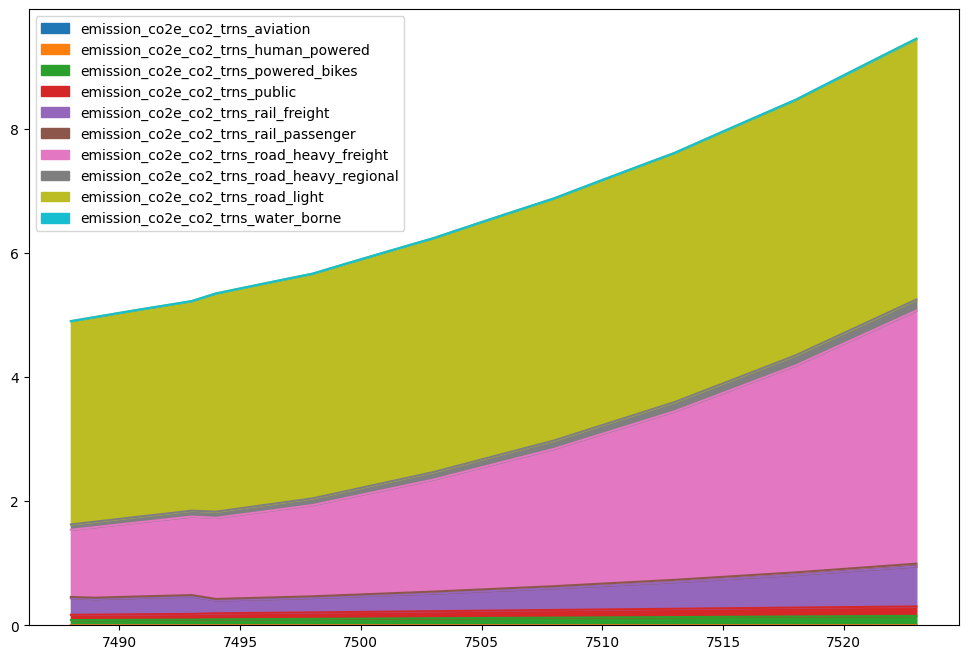

In [6]:
df_plot = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["guatemala"])
][[x for x in df_out.columns if x.startswith("emission_co2e_co2") and ("trns" in x)]]

fig, ax = plt.subplots(figsize = (12, 8))
df_plot.plot.area(ax = ax)

In [8]:
df_try = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["brazil"])
];

In [37]:
subsec = "Industrial Energy"
dict_repl = {
    "Carbon Capture and Sequestration": "CCSQ",
    "Stationary Combustion and Other Energy": "SCOE"
}

for subsec in ["Carbon Capture and Sequestration", "Industrial Energy", "Stationary Combustion and Other Energy", "Transportation"]:
    #sisepuede.model_attributes.get_standard_variables(
    #    df_try,
        #"Energy Demand by Fuel in Industrial Energy"
    #    "Energy Consumption from Transportation"
    #)
    
    snm = dict_repl.get(subsec, subsec)
    
    vl_1 = sisepuede.model_attributes.build_varlist(
        subsec, f"Energy Consumption from {snm}"
    )
    vl_2 = sisepuede.model_attributes.build_varlist(
        "Energy Fuels", f"Energy Demand by Fuel in {snm}"
    )
    
    print(subsec)
    print("-"*len(subsec) + "\n")
    
    str_print = " +\n".join(vl_1) + "\n = \n" + " +\n".join(vl_2) + "\n\n\n"
    
    print(str_print)



Carbon Capture and Sequestration
--------------------------------

energy_consumption_ccsq_direct_air_capture
 = 
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_furnace +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_petroleum_liquid +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gasoline +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_geothermal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydrogen +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_nat

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [8]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
71,1,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
107,2,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
143,1001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
179,2001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
215,3001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
251,3002,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
287,3003,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
323,3004,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
359,3005,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0


In [7]:
df_try

,future_id,time_period,strategy_id,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,0,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.625305,0.928300,2.714180,1.650240,4.404067,1.053567,5.752500,74.202600,16.945400,23.352171
1,0,1,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,18.450614,0.908800,1.923760,1.561520,4.602733,1.558033,5.464300,75.176300,17.112775,24.085471
2,0,2,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.820124,0.938300,2.034620,1.704260,5.412067,1.330933,6.213100,74.455900,17.432550,24.498743
3,0,3,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.747876,0.869200,2.256860,1.743060,5.181767,1.568433,6.307400,74.575900,17.414775,25.249429
4,0,4,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.682295,0.875600,1.987220,1.608520,5.488767,1.762200,6.063300,74.657000,17.579100,25.731600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,31,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,33.595444,1.494550,3.391959,2.745561,9.368702,3.007875,10.349365,127.431024,30.005528,43.920920
1256,0,32,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.267352,1.524441,3.459798,2.800472,9.556076,3.068033,10.556352,129.979644,30.605639,44.799338
1257,0,33,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.952699,1.554930,3.528994,2.856482,9.747197,3.129394,10.767479,132.579237,31.217751,45.695325
1258,0,34,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,35.651753,1.586028,3.599574,2.913611,9.942141,3.191981,10.982829,135.230822,31.842106,46.609232


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

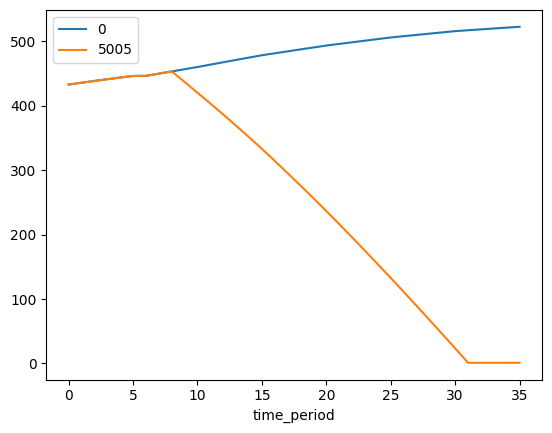

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [7]:
import model_attributes as ma
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_energy as me
import model_electricity as ml
import model_socioeconomic as se
import setup_analysis as sa
import support_functions as sf
import importlib
import time
import warnings
import sql_utilities as sq
from typing import *
import sqlalchemy
import sql_utilities as sqlutil

import importlib

importlib.reload(ma)
importlib.reload(sa)
importlib.reload(mafl)
importlib.reload(me)
importlib.reload(ml)

#importlib.reload(mafl)

warnings.filterwarnings("ignore")

#df_cs_integrated = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))
#df_cs_integrated = df_cs_integrated[
#    df_cs_integrated["strategy_id"].isin([0])
#].reset_index(drop = True)

df_cs_integrated = sisepuede.experimental_manager.dict_future_trajectories.get("mexico").generate_future_from_lhs_vector(None, None, 0, True)
df_cs_integrated = df_cs_integrated[
    (df_cs_integrated["strategy_id"] == 3005)
].reset_index(drop = True)

vars_try = [x for x in df_cs_integrated.columns if x.startswith("fuelefficiency_") and ("road_light" in x)]
for x in vars_try:
    df_cs_integrated[x] = min(np.array(df_cs_integrated[x]))

    
model_afolu = mafl.AFOLU(sa.model_attributes);
model_circecon = mc.CircularEconomy(sa.model_attributes);
model_ippu = mi.IPPU(sa.model_attributes);
model_energy = me.NonElectricEnergy(sa.model_attributes);

# 
df_project_afolu = model_afolu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_afolu], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ce = model_circecon.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ce], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ip = model_ippu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ip], sa.model_attributes, "concatenate")

# pass integrated df
df_project_en = model_energy.project(df_cs_integrated, subsectors_project = ["ccsq", "inen", "scoe", "trns", "fgtv"]);
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_en], sa.model_attributes, "concatenate")

model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger)


2023-02-22 12:51:21,246 - INFO - Calling Julia API...
2023-02-22 12:51:21,390 - DEBUG - 	Successfully activated Julia with compiled_modules = False
2023-02-22 12:51:21,391 - DEBUG - 	Successfully imported julia.Base
2023-02-22 12:51:21,391 - DEBUG - 	Successfully imported julia.Main
2023-02-22 12:51:21,393 - DEBUG - 	Successfully imported julia.Pkg
2023-02-22 12:51:22,187 - DEBUG - 	Available Packages:
		'CSV'
		 'HiGHS'
		 'SQLite'
		 'Clp'
		 'JuMP'
		 'NemoMod'
		 'GAMS'
		 'Cbc'
		 'DataFrames'
		 'Gurobi'
		 'MathOptInterface'
  Activating2023-02-22 12:51:23,374 - INFO - Successfully activated Julia environment at '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/julia'
 project at `~/Documents/Projects/git_jbus/lac_decarbonization/julia`
2023-02-22 12:51:23,476 - INFO - Successfully initialized JuMP optimizer from solver module Gurobi.


In [29]:
importlib.reload(ma)
importlib.reload(sa)
sa.model_attributes.get_region_list_filtered("chile")

['chile']

In [11]:
model_elec.dict_nemomod_reference_tables.keys()

dict_keys(['CapacityFactor', 'SpecifiedDemandProfile'])

In [12]:
model_elec.format_nemomod_table_capacity_factor(
    model_elec.dict_nemomod_reference_tables.get("CapacityFactor")
)

{'CapacityFactor':           id           r          t            l     y   val
 0          1  costa_rica  pp_biogas  dec_feb_wd0  1000  0.50
 1          2  costa_rica  pp_biogas  dec_feb_wd0  1001  0.50
 2          3  costa_rica  pp_biogas  dec_feb_wd0  1002  0.50
 3          4  costa_rica  pp_biogas  dec_feb_wd0  1003  0.50
 4          5  costa_rica  pp_biogas  dec_feb_wd0  1004  0.50
 ...      ...         ...        ...          ...   ...   ...
 13819  13820  costa_rica    pp_wind  sep_nov_we6  1031  0.27
 13820  13821  costa_rica    pp_wind  sep_nov_we6  1032  0.27
 13821  13822  costa_rica    pp_wind  sep_nov_we6  1033  0.27
 13822  13823  costa_rica    pp_wind  sep_nov_we6  1034  0.27
 13823  13824  costa_rica    pp_wind  sep_nov_we6  1035  0.27
 
 [13824 rows x 6 columns]}

In [ ]:

model_elec.format_nemomod_table_specified_demand_profile()

In [66]:
sisepuede.model_attributes.get_standard_variables(
    df_cs_integrated,
    model_energy.modvar_inen_energy_consumption_total
)

,energy_consumption_inen_agriculture_and_livestock,energy_consumption_inen_cement,energy_consumption_inen_chemicals,energy_consumption_inen_electronics,energy_consumption_inen_glass,energy_consumption_inen_lime_and_carbonite,energy_consumption_inen_metals,energy_consumption_inen_other_product_manufacturing,energy_consumption_inen_paper,energy_consumption_inen_plastic,energy_consumption_inen_recycled_glass,energy_consumption_inen_recycled_metals,energy_consumption_inen_recycled_paper,energy_consumption_inen_recycled_plastic,energy_consumption_inen_recycled_rubber_and_leather,energy_consumption_inen_recycled_textiles,energy_consumption_inen_recycled_wood,energy_consumption_inen_rubber_and_leather,energy_consumption_inen_textiles
0,3.159000,242.661005,18.839838,0.418887,0.436975,0.336364,313.939442,0.278809,21.868323,8.131261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119719,1.287580
1,3.137413,240.588907,18.858404,0.420287,0.429323,0.336306,314.112042,0.260651,22.071983,8.145407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119671,1.287892
2,3.176989,241.390972,18.921273,0.421688,0.428351,0.337427,315.150235,0.264126,22.119334,8.159666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119882,1.290949
3,3.220262,242.185120,18.983522,0.423075,0.427325,0.338537,316.177628,0.267602,22.164753,8.173101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120086,1.293897
4,3.252176,242.971533,19.045164,0.424449,0.426307,0.339636,317.195294,0.271078,22.210414,8.186709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120288,1.296857
5,3.341644,243.750383,19.106214,0.425809,0.425344,0.340725,318.204054,0.274554,22.257866,8.201201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120494,1.299916
6,3.432190,245.686597,19.257983,0.429192,0.425996,0.343431,320.753114,0.283277,22.482030,8.286031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121330,1.313494
7,3.529621,247.578092,19.406246,0.432496,0.424684,0.346075,323.218604,0.292001,22.637461,8.339671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121945,1.323186
8,3.631408,249.427205,19.551188,0.435726,0.423279,0.348660,325.628729,0.300724,22.788952,8.391856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122538,1.332645
9,3.737724,251.236088,19.692976,0.438886,0.421784,0.351189,327.986297,0.309448,22.936703,8.442661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123111,1.341884


In [89]:
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
os.remove(fp_sqlite_intermediate) if os.path.exists(fp_sqlite_intermediate) else None
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")
t0 = time.time()
df_test = model_elec.project(df_cs_integrated, engine = engine)
t1 = time.time()

2023-02-20 00:09:39,451 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-20-Feb 00:09:39.455 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-20-Feb 00:09:39.487 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-20 00:10:00,252 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>


2023-20-Feb 00:09:41.195 Started modeling scenario.
2023-20-Feb 00:10:00.056 Finished modeling scenario.


In [78]:
table_name = "vregenerationannualnn"
#table_name = "vproductionbytechnologyannual"
#table_name = "REMinProductionTarget"
df = sqlutil.sql_table_to_df(engine, table_name)


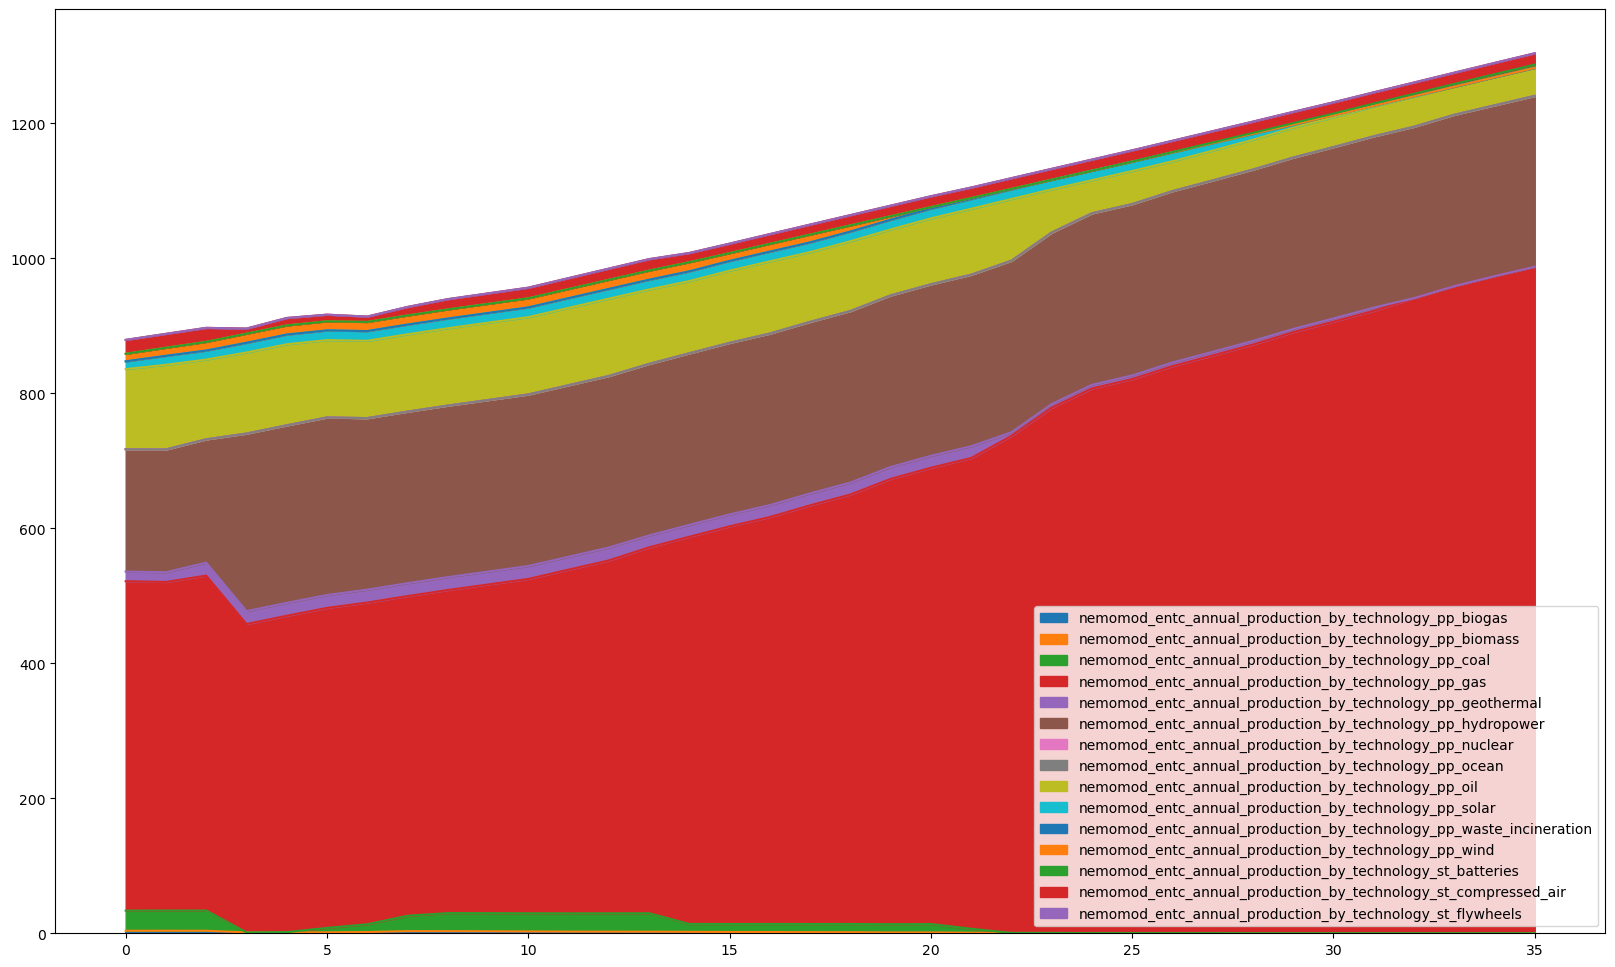

In [90]:

dict_filt2 = {}


fig, ax = plt.subplots(figsize = (20, 12))

if True:
    sisepuede.model_attributes.get_standard_variables(
        df_test,
        sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    ).plot.area(ax = ax)
else:
    sisepuede.model_attributes.get_standard_variables(
        df_cs_integrated,
        sisepuede.models.model_electricity.modvar_entc_nemomod_residual_capacity
    ).plot.area(ax = ax)

In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)



In [43]:
df_iar = sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)
df_oar = sq.sql_table_to_df(
    engine,
    "OutputActivityRatio"
    #"InputActivityRatio"
)
df_oar

,id,r,t,f,m,y,val
0,1,costa_rica,pp_biogas,fuel_electricity,generate,1000,1.0
1,2,costa_rica,pp_biogas,fuel_electricity,generate,1001,1.0
2,3,costa_rica,pp_biogas,fuel_electricity,generate,1002,1.0
3,4,costa_rica,pp_biogas,fuel_electricity,generate,1003,1.0
4,5,costa_rica,pp_biogas,fuel_electricity,generate,1004,1.0
...,...,...,...,...,...,...,...
967,968,costa_rica,supply_fuel_wind,fuel_wind,generate,1031,1.0
968,969,costa_rica,supply_fuel_wind,fuel_wind,generate,1032,1.0
969,970,costa_rica,supply_fuel_wind,fuel_wind,generate,1033,1.0
970,971,costa_rica,supply_fuel_wind,fuel_wind,generate,1034,1.0


In [2]:
sq.sql_table_to_df(
    engine,
    "FUELS"
    #"InputActivityRatio"
)

NameError: name 'sq' is not defined

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [9]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)
df_try.to_csv(
    os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
    encoding = "UTF-8",
    index = None
)

In [31]:
import inspect
sisepuede.odpt_primary.get_key_value(
    strategy_id = 3011,
    future_id = 0, 
    design_id = 0
)




15015

In [17]:
df_out[
    (df_out["region"] == "brazil") & 
    (df_out["time_period"].isin([4, 5])) & 
    (df_out["primary_id"].isin([0, 15015])) 
][
    [x for x in df_out.columns if ("emission_co2e" in x) and ("trns" in x)]
]


,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
940,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.122332,0.006572,1.316938,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.923724,0.047992,3.556169,0.000371,237.558203
941,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.120889,0.006596,1.322850,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.910773,0.048171,3.572172,0.000370,237.439346
1336,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.123489,0.006572,1.320636,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.935050,0.047992,3.565980,0.000371,238.819438
1337,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.122964,0.006596,1.327975,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.931073,0.048171,3.585797,0.000370,239.514858


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

